## Use TA-Lib library to detect price candle's patterns 

In technical analysis, chart pattern is recognizable price movement that may contain information of price trend. Patterns can be composed of a series of candles. TA-Lib is a Technical Analysis Library that contain functions to detect candlestick patterns. This notebook is to demonstrate how to use these functions and will list all recognized patterns alone with the price chart. 


In [51]:
import pandas as pd
import numpy as np
import talib
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# to correctly show unicode characters
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

%matplotlib inline  

### performance metrics to condense patterns

Overall performance rank from http://thepatternsite.com
 
Following TA-Lib patterns are excluded from the analysis since the corresponding ranking not found:
CounterAttack, Longline, Shortline, Stalledpattern, Kickingbylength
assging very large numbers now 

In [52]:
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104,
        "CDLCOUNTERATTACK_Bull": 1001,
        "CDLCOUNTERATTACK_Bear": 1001,
        "CDLLONGLINE_Bull": 1002,
        "CDLLONGLINE_Bear": 1002,
        "CDLSHORTLINE_Bull": 1002,
        "CDLSHORTLINE_Bear": 1002,
        "CDLSTALLEDPATTERN_Bull": 1003,
        "CDLSTALLEDPATTERN_Bear": 1003,
        "CDLKICKINGBYLENGTH_Bull": 1004,
        "CDLKICKINGBYLENGTH_Bear": 1004,
    }


Read the stocks price data

In [53]:

# read a sampel data file
file_path = "C:\\Users\\xiaochuan\\Documents\\quant\\{}"
file_name = "AAPL.csv"
stock_data = pd.read_csv(file_path.format(file_name))

# set data as index 
stock_data.Date = pd.to_datetime(stock_data.Date,  format="%m/%d/%Y") 
stock_data.set_index("Date", inplace = True)

# set column names in case original file is named differently 
stock_data.Columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-28,188.949997,189.559998,187.529999,188.720001,186.281738,20780400
2019-03-29,189.830002,190.080002,188.539993,189.949997,187.495865,23564000
2019-04-01,191.639999,191.679993,188.380005,191.240005,188.769211,27862000
2019-04-02,191.089996,194.460007,191.050003,194.020004,191.513290,22765700
2019-04-03,193.250000,196.500000,193.149994,195.350006,192.826111,23271800


Get the individual columes

In [54]:

opens_hst  = stock_data.Open  
highs_hst  = stock_data.High
lows_hst   = stock_data.Low
closes_hst = stock_data.Close  
# fill out missing values 
opens_hst  = opens_hst .ffill() # forward fill w/ prev val if NaN latest  
highs_hst  = highs_hst .ffill()  
lows_hst   = lows_hst  .ffill()  
closes_hst = closes_hst.ffill()  
opens_hst  = opens_hst .bfill() # back fill any NaN with current  
highs_hst  = highs_hst .bfill() 
# change to numpy array 
sec        = np.arange(len(stock_data))
O          = np.array( opens_hst[sec])  
H          = np.array( highs_hst[sec])  
L          = np.array(  lows_hst[sec])  
C          = np.array(closes_hst[sec])


Apply TA_Lib functions to the prices 

In [55]:

# List of CDL function names as strings  
cdls = re.findall('(CDL\w*)', ' '.join(dir(talib)))


for cdl in cdls:  
    # cdl = 'CDL2CROWS'
    # toExec = getattr(talib, cdl)  
    # out    = toExec(np.array(O), np.array(H), np.array(L), np.array(C))  
    # print(str(out) + ' ' + cdl)
    stock_data[cdl] = getattr(talib, cdl)(O, H, L, C)

stock_data.head()


,Open,High,Low,Close,Adj Close,Volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-28,188.949997,189.559998,187.529999,188.720001,186.281738,20780400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-03-29,189.830002,190.080002,188.539993,189.949997,187.495865,23564000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-01,191.639999,191.679993,188.380005,191.240005,188.769211,27862000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-02,191.089996,194.460007,191.050003,194.020004,191.513290,22765700,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-04-03,193.250000,196.500000,193.149994,195.350006,192.826111,23271800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


If multiple patterns are found for a single candle, I use the pattern ranking to choose the pattern of the highest rank for that candle. 

In [56]:
df = stock_data

df['candlestick_pattern'] = np.nan
df['candlestick_match_count'] = np.nan

for index, row in df.iterrows():
    #index = df_indx[0]
    keys = df.loc[index,][cdls].keys().values
    values = df.loc[index,][cdls].values
    # no pattern founddf.iloc[1,]
    if len(row[cdls]) - sum(row[cdls] == 0) == 0:
        df.loc[index,'candlestick_pattern'] = "NO_PATTERN"
        df.loc[index,'candlestick_match_count'] = 0
    # single pattern found
    elif len(row[cdls]) - sum(row[cdls] == 0) == 1:
        # bull pattern 100 or 200
        if any(row[cdls].values > 0):
            pattern = list(keys[values != 0])[0] + "_Bull"
            df.loc[index, 'candlestick_pattern'] = pattern
            df.loc[index,'candlestick_match_count'] = 1
        # bear pattern -100 or -200
        else:
            pattern = list(keys[values != 0])[0] + '_Bear'
            df.loc[index, 'candlestick_pattern'] = pattern
            df.loc[index,'candlestick_match_count'] = 1
    # multiple patterns matched -- select best performance
    else:
        # filter out pattern names from bool list of values
        patterns = list(keys[values != 0])
        container = []
        for pattern in patterns:
            if row[pattern] > 0:
                container.append(pattern + '_Bull')
            else:
                container.append(pattern + '_Bear')
        rank_list = [candle_rankings[p] for p in container]
        # what if not equal (no match exists)?
        if len(rank_list) == len(container):
            rank_index_best = rank_list.index(min(rank_list))
            df.loc[index,'candlestick_pattern'] = container[rank_index_best]
            df.loc[index,'candlestick_match_count'] = len(container)
            
# clean up candle columns
df.drop(cdls, axis = 1, inplace = True)




In [57]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,candlestick_pattern,candlestick_match_count
Date,,,,,,,,
2019-03-28,188.949997,189.559998,187.529999,188.720001,186.281738,20780400,NO_PATTERN,0.0
2019-03-29,189.830002,190.080002,188.539993,189.949997,187.495865,23564000,NO_PATTERN,0.0
2019-04-01,191.639999,191.679993,188.380005,191.240005,188.769211,27862000,NO_PATTERN,0.0
2019-04-02,191.089996,194.460007,191.050003,194.020004,191.513290,22765700,CDLENGULFING_Bull,2.0
2019-04-03,193.250000,196.500000,193.149994,195.350006,192.826111,23271800,CDL3OUTSIDE_Bull,2.0
2019-04-04,194.789993,196.369995,193.139999,195.690002,193.161682,19114300,NO_PATTERN,0.0
2019-04-05,196.449997,197.100006,195.929993,197.000000,194.454758,18526600,NO_PATTERN,0.0
2019-04-08,196.419998,200.229996,196.339996,200.100006,197.514709,25881700,NO_PATTERN,0.0
2019-04-09,200.320007,202.850006,199.229996,199.500000,196.922470,35768200,NO_PATTERN,0.0


function to plot the candle with the list of pattern recognized detected. 

In [58]:
# ======================================================================================
# print k curves with TA-Lib patterns 
#=======================================================================================


def plot_Kline_Candle_Label(data, color_function = None):   
    # data need to be pandas dataframe with columns of Open, High, Low ,Close and index with date
  
    def default_color(index, open_price, close_price, low, high):
        return 'r' if open_price > close_price else 'g' 

    color_function = color_function or default_color 

    fig = plt.figure(dpi=100, figsize=(10,5))
    ax1 = fig.add_axes([0.05, 0.1, 0.85, 0.65])    # [left, bottom, width, height]           
    # fig.set_size_inches(15, 5)
    ax1.set_xlim(0, len(data))
    candle_colors = []
    for i in range(len(data)):
        close_price,open_price =  data.iloc[i,][ "Close"], data.iloc[i,][ "Open"]
        high_price, low_price = data.iloc[i,][ "High"], data.iloc[i,][ "Low"]

        candle_colors.append(color_function(i, open_price, close_price, low_price, high_price))

        trade_date = data.index[i]
        if close_price > open_price:# up candle
            ax1.add_patch(patches.Rectangle((i-0.2, open_price), 0.4, close_price-open_price, fill=False, color='g'))
            ax1.plot([i, i], [low_price, open_price], 'g')
            ax1.plot([i, i], [close_price, high_price], 'g')
        else:# down candle
            ax1.add_patch(patches.Rectangle((i-0.2, open_price), 0.4, close_price-open_price, color='r'))
            ax1.plot([i, i], [low_price, high_price], color='r')
        
    # ax1.set_title("Price", fontsize=15, loc='left', color='r')    
    ax1.set_xticks(range(0,len(data),5))
    ax1.set_xticklabels([(data.index[i]).strftime('%Y-%m-%d') for i in ax1.get_xticks()] , rotation=20)
    ax1.tick_params(axis='both', which='major', labelsize=10)
    
    ax2 = ax1.twiny()
    ax2.set_xlabel("Candle Label")
    ax2.set_xlim(0, len(data))

    ax2.set_xticks(range(0,len(data),1))
    ax2.set_xticklabels([x if x !=  'NO_PATTERN' else '' for x in data.candlestick_pattern.values],rotation=270)
    fig.autofmt_xdate(rotation=45)
     # end of function 




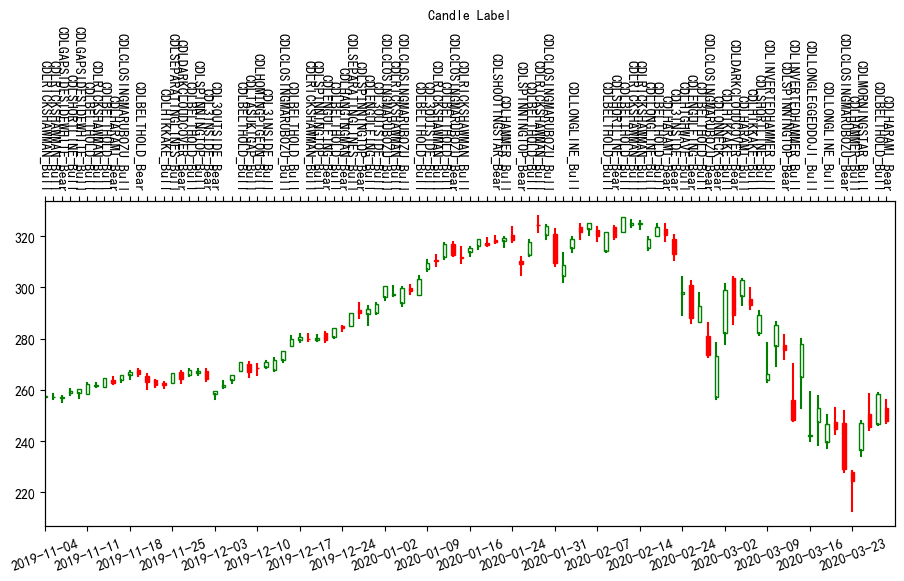

In [59]:
plot_Kline_Candle_Label(df.iloc[-100:])
plt.show()
